In [1]:
import matplotlib.pyplot as plt
import numpy as np
import spatial_profiles as prf
import models
import boundary_conditions
import plotting

%matplotlib widget

In [13]:
h_conc_molar = 1e-7
ion_conc_molar = 1e-3
ion_diameter_m = 15e-10
solvent_diameter_m = 2.75e-10

x = prf.get_x_axis_nm(xmax_nm=1000, n_points=1000)

H = models.Species(h_conc_molar, ion_diameter_m, +1, r'H$^+$')
ClO4 = models.Species(h_conc_molar + ion_conc_molar, ion_diameter_m, -1, r'ClO$_4^-$')
Na = models.Species(ion_conc_molar, ion_diameter_m, +1, r'Na$^+$')
species_list = [H, ClO4, Na]
water = models.Solvent(ion_diameter_m, r'H$_2$O')
multi = models.Multispecies(species_list, water, eps_r_opt=78)

bc = boundary_conditions.Insulator(-np.log10(h_conc_molar), multi)

multi_sol = multi.solve(x, bc)

Solved in 2 iterations, number of nodes 1814. 
Maximum relative residual: 3.13e-05 
Maximum boundary residual: 1.09e-06
ODE problem solved and saved under ./solutions/Multispecies 0.0010\sol_Multispecies 0.0010_c0_0.0010M__xmax_1000nm__bc_Insulator_pH7.pkl.


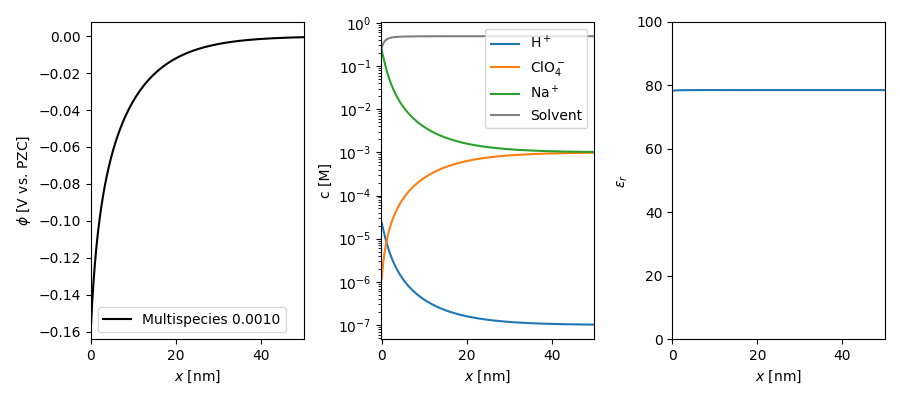

In [14]:
xmin = -0.05
xmax = 50

fig, ax = plotting.plot_solution(multi_sol, xmin, xmax, logscale=True)